## Purpose: Based on given dataset find out that the student got replacement or not

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for plot
from sklearn.model_selection import train_test_split #for spliting train and test data
from sklearn.preprocessing import StandardScaler #for making data range from -1 to 1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #for model accuracy
from mlxtend.plotting import plot_decision_regions #for plotting decision region line
import pickle #Convert object into file

In [41]:
df=pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df.shape

(100, 4)

In [4]:
df=df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


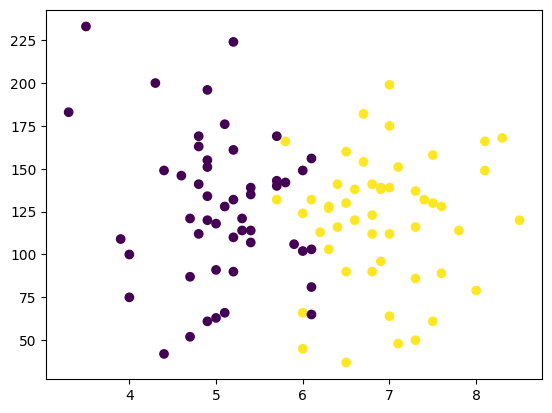

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) #yellow guys got placement

### Extract input-output

In [12]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [14]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [15]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

### Train-Test data split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1) # 0.1 means 10% data will go to testing set and the 90% data will be in the training set

In [22]:
X_train

,cgpa,iq
78,6.1,81.0
8,6.1,156.0
97,6.7,182.0
61,7.3,137.0
44,7.5,61.0
...,...,...
1,5.9,106.0
56,6.1,65.0
14,6.1,103.0
36,5.7,140.0


In [23]:
y_train

78    0
8     0
97    1
61    1
44    1
     ..
1     0
56    0
14    0
36    0
71    1
Name: placement, Length: 90, dtype: int64

In [24]:
X_test

,cgpa,iq
57,6.5,130.0
66,6.9,96.0
62,6.0,102.0
32,7.0,139.0
89,4.9,151.0
3,7.4,132.0
40,4.9,134.0
51,4.8,141.0
24,4.7,121.0
26,7.0,199.0


In [25]:
y_test

57    1
66    1
62    0
32    1
89    0
3     1
40    0
51    0
24    0
26    1
Name: placement, dtype: int64

 ### making data range from -1 to 1

In [27]:
scaler = StandardScaler()

In [29]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.09666552, -1.01533582],
       [ 0.09666552,  0.82552284],
       [ 0.61865932,  1.46368718],
       [ 1.14065312,  0.35917198],
       [ 1.31465105, -1.50623147],
       [ 0.70565829, -0.25444758],
       [ 0.44466139, -0.79443278],
       [ 0.53166035,  0.38371676],
       [ 0.87965622,  1.2918737 ],
       [ 1.14065312, -0.15626845],
       [ 1.40165002,  0.13826894],
       [-0.94732208,  1.80731413],
       [ 0.87965622, -1.43259712],
       [-0.25133035,  1.14460501],
       [ 0.96665519, -1.82531364],
       [-1.38231691,  0.65370937],
       [-1.20831898,  0.58007502],
       [ 1.57564795, -0.20535801],
       [-0.94732208,  0.80097806],
       [-1.12132001, -0.86806713],
       [-0.51232725, -0.37717149],
       [-0.68632518,  2.49456803],
       [ 0.35766242, -0.15626845],
       [ 1.14065312, -0.89261191],
       [ 0.27066345,  0.11372416],
       [-1.03432105,  0.99733632],
       [-0.68632518, -0.30353714],
       [ 0.00966655,  0.65370937],
       [-0.94732208,

In [32]:
X_test=scaler.fit_transform(X_test)
X_test

array([[ 0.47662754, -0.16721232],
       [ 0.86571124, -1.43059426],
       [-0.00972709, -1.2076445 ],
       [ 0.96298217,  0.16721232],
       [-1.07970728,  0.61311182],
       [ 1.35206587, -0.09289573],
       [-1.07970728, -0.01857915],
       [-1.17697821,  0.2415289 ],
       [-1.27424913, -0.50163695],
       [ 0.96298217,  2.39670986]])

### Model the training data

In [34]:
clf=LogisticRegression()

In [35]:
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Model accuracy

In [46]:
y_pred=clf.predict(X_test) #prediction value that came out from this model
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [38]:
y_test #actual value

57    1
66    1
62    0
32    1
89    0
3     1
40    0
51    0
24    0
26    1
Name: placement, dtype: int64

In [47]:
accuracy_score(y_test,y_pred)

0.9

<Axes: >

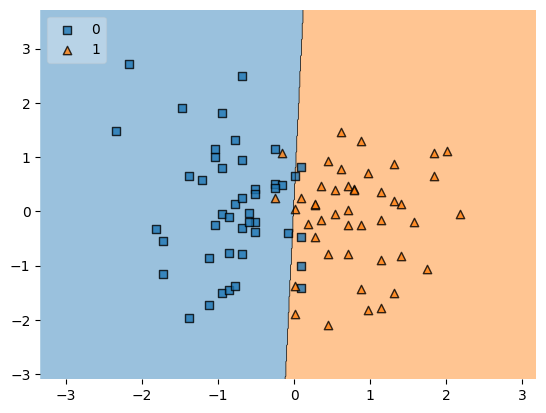

In [55]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

### Exporting the model

In [58]:
pickle.dump(clf,open('prac_project1.pkl','wb'))